# Classifying Obesity Levels Using Diet, Physical Condition, Health, and Other Factors


## Table of Contents

>[Classifying Obesity Levels Using Diet, Physical Condition, Health, and Other Factors](#scrollTo=INMnO0clVg0j)

>>[Table of Contents](#scrollTo=fZAt65Ty8BVc)

>>[Project Topic and Overview](#scrollTo=KUBeNZm6v9O0)

>>>[Overview of Project Models](#scrollTo=bmFT3tDCyTeZ)

>>>[Goals](#scrollTo=ppfDTZvBAYDm)

>>[Data Source](#scrollTo=iPdsrbGIyxD6)

>>>[APA Format for Data Source](#scrollTo=ic7vu3X38CA9)

>>[Libraries and Data Read In](#scrollTo=DFGWRbPfxB8L)

>>>[Original Data Size and Information](#scrollTo=XCEmYh5oomcJ)

>>[Data Cleaning](#scrollTo=fmN9A_MPFuz_)

>>>[Column Name Changes](#scrollTo=HO2Sr60mGcUg)

>>>[Adding Body Mass Index (BMI)](#scrollTo=ykkXQXY7GaBA)

>>>[Range of BMI Values by Weight Category](#scrollTo=cN4Htj_lHGvN)

>>>[Revising the Weight/Obesity Categories](#scrollTo=IqRR97B-HfzJ)

>>>[Deleting Columns](#scrollTo=PxC5yCReJSco)

>>>[Adjusting Cell Values](#scrollTo=NsO01_N2e6R4)

>>>[One Hot Encoding](#scrollTo=cUaWayACm7nN)

>>>[Finalizing Initial Cleaning](#scrollTo=G0nR0NF2nSxh)

>>[Exploratory Data Analysis (EDA)](#scrollTo=vfFfm6OJvbwI)

>>>[Correlation Matrix](#scrollTo=98unoGTpzkf_)

>>>[Pair plot of BMI vs. Age](#scrollTo=MYAV5CMW6LIT)

>>[Random Forest Classification](#scrollTo=BB8CllJGd6ci)

>>>[Training and Test Set](#scrollTo=Tfm8xX6Ad_oT)

>>>[Hyperparameter Tuning](#scrollTo=JtoEP66EjUtt)

>>>[Best Model and Evaluation](#scrollTo=OZd-0YaljdkN)

>>[Neural Network Classification](#scrollTo=5EuAWiaY_moA)

>>>[Updating Dataset for Deep Learning](#scrollTo=_-6Q5nCfqqNd)

>>>>[One Hot Encoding](#scrollTo=YJ9e4z7fNZcO)

>>>>[Scaling](#scrollTo=4XMrM5fffV5e)

>>>[Training and Test Split for Features and Targets](#scrollTo=K5P9aY2ffcOa)

>>>[Architecture 1 - Modeling](#scrollTo=k9uc7cKffqlT)

>>>>[Hyperparameter Tuning](#scrollTo=HzeO0wdD0ong)

>>>>[Evaluation](#scrollTo=fIOKfOz4JoyW)

>>>[Architecture 2 - Modeling](#scrollTo=giwVGIhnYqDl)

>>>>[Hyperparameter Tuning](#scrollTo=T_xIoD-6bcVC)

>>>>[Evaluation](#scrollTo=xlKRCcuKb3US)

>>[Conclusion](#scrollTo=r2YCxH2-YKc2)

>>>>[Random Forest](#scrollTo=iL2QhXGmUoz1)

>>>>[Neural Network](#scrollTo=8qhrfowSUskE)



## Project Topic and Overview


This project will look at data dealing with diet, physical condition, health, and other factors.

The first part of the project looks at classification of obesity levels using supervised learning.

The second part of the project looks at classification of obesity levels using deep learning.

### Overview of Project Models

This project will have 2 approaches.

1. The first model will use the ensemble method of random forests.
2. Secondly, we will look at neural networks. This is our deep learning method of choice.

### Goals

The first goal of this project is to be able to predict or classify accurately based on the features provided. The original dataset has 16 features and was obtained by survey. Nearly all features were binary or ordinal values. These categorical values along with response bias pose a challenge in ensuring that the models are accurate.

The second goal is to obtain a high performing deep learning model. For tabular data with relatively few features, random forest models usually outperform deep learning models. We will investigate and see how close we can get a neural network model to a random forest model in terms of accuracy.

## Data Source

The dataset is called **Estimation of Obesity Levels Based On Eating Habits and Physical Condition** and is from the **UC Irvine Machine Learning Repository**. The dataset and more information about it can be found at the following link:

https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

According to the description, the dataset includes "data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform."

There is also an introductory paper that accompanies the dataset that can be found at the following link:

https://www.semanticscholar.org/paper/Dataset-for-estimation-of-obesity-levels-based-on-Palechor-Manotas/35b40bacd2ffa9370885b7a3004d88995fd1d011

### APA Format for Data Source

Mendoza Palechor, F., & De la Hoz Manotas, A. (2019, August 1). "*Estimation of Obesity Levels Based On Eating Habits and Physical Condition*":
>> UC Irvine Machine Learning Repository.   
>> https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

## Libraries and Data Read In

In [1]:
#libraries and imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout
from tensorflow.keras.models import Sequential

#sets seed for reproducibility
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [2]:
#data read in
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

### Original Data Size and Information

The data that we read in is tabulated data. The sample size is 2,111 with 16 features and 1 target variable (for supervised learning). Information on the variables can be found in the table below. The table also includes context for each column. We will be making changes in the Data Cleaning section, so the variables will change a bit.

| Variable Name                   | Role    | Type         | Description                                    |
|---------------------------------|---------|--------------|------------------------------------------------|
| Gender                          | Feature | Categorical  |                                                |
| Age                             | Feature | Continuous   |                                                |
| Height                          | Feature | Continuous   |                                                |
| Weight                          | Feature | Continuous   |                                                |
| family_history_with_overweight  | Feature | Binary       | Has a family member suffered or suffers from overweight? |
| FAVC                            | Feature | Binary       | Do you eat high caloric food frequently?        |
| FCVC                            | Feature | Integer      | Do you usually eat vegetables in your meals?    |
| NCP                             | Feature | Continuous   | How many main meals do you have daily?          |
| CAEC                            | Feature | Categorical  | Do you eat any food between meals?              |
| SMOKE                           | Feature | Binary       | Do you smoke?                                   |
| CH2O                            | Feature | Continuous   | How much water do you drink daily?              |
| SCC                             | Feature | Binary       | Do you monitor the calories you eat daily?      |
| FAF                             | Feature | Continuous   | How often do you have physical activity?        |
| TUE                             | Feature | Integer      | How much time do you use technological devices such as cell phone, videogames, television, computer and others? |
| CALC                            | Feature | Categorical  | How often do you drink alcohol?                 |
| MTRANS                          | Feature | Categorical  | Which transportation do you usually use?        |
| NObeyesdad                      | Target  | Categorical  | Obesity level                                  |


In the following cells we can see the data size once more, the data types of the columns, the first few rows of the data, and a quick statistical summary of the dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
#statistical summary of numerical columns
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Data Cleaning

### Column Name Changes

The column names are a bit confusing. We'll update the column names so they're easier to understand without having to look up the variable information from the source. We'll use the table from the Libraries and Data Read In section to to make the contextual changes.

In [6]:
#renames the columns of the data
renameCol = ['gender', 'age', 'height', 'weight', 'family_hist',
             'high_cal','vegetable_cons', 'meal_num', 'between_meals', 'smoke',
             'water_cons', 'monitor_cal', 'physical_act', 'tech_time',
             'alcohol_cons', 'transport_type', 'weight_category']

data.columns = renameCol
data.head()

,gender,age,height,weight,family_hist,high_cal,vegetable_cons,meal_num,between_meals,smoke,water_cons,monitor_cal,physical_act,tech_time,alcohol_cons,transport_type,weight_category
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Adding Body Mass Index (BMI)

According to the paper that accompanies the data, the obesity categories are based off of BMI. We'll add a BMI column in so that we can see it for each person. Note that height is already in $m$ and weight is already in $kg$.

In [7]:
#calculates bmi and adds a bmi column
data['bmi'] = data['weight']/(data['height'] ** 2)
data.head()

,gender,age,height,weight,family_hist,high_cal,vegetable_cons,meal_num,between_meals,smoke,water_cons,monitor_cal,physical_act,tech_time,alcohol_cons,transport_type,weight_category,bmi
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


### Range of BMI Values by Weight Category

Below is the range of `bmi` values for each `weight_category`.

In [8]:
#checks the min and max of each weight category
bmi_stats = data.groupby('weight_category')['bmi'].agg(['min', 'max']).reset_index()
print(bmi_stats)

       weight_category        min        max
0  Insufficient_Weight  12.998685  19.082206
1        Normal_Weight  18.491124  24.913495
2       Obesity_Type_I  29.911958  35.171095
3      Obesity_Type_II  34.048509  39.786652
4     Obesity_Type_III  36.774400  50.811753
5   Overweight_Level_I  22.826739  28.769607
6  Overweight_Level_II  25.713513  30.362877


### Revising the Weight/Obesity Categories

According to the paper, the categories should follow:
* Underweight: Less than 18.5
* Normal: 18.5 to 24.9
* Overweight: 25.0 to 29.9
* Obesity I: 30.0 to 34.9
* Obesity II: 35.0 to 39.9
* Obesity III: Higher than 40

Not only are there misclassifications and inconsistent category values, but the number of categories are different as well. We'll update these categories and ranges. Note, integer labels were used so that we are prepared for our deep learning steps later.

In [9]:
#function to assign the proper category using bmi
def bmi_to_class(bmi):
    #underweight
    if bmi < 18.5:
        return 0
    #normal
    elif 18.5 <= bmi < 25.0:
        return 1
    #overweight
    elif 25.0 <= bmi < 30.0:
        return 2
    #obesity I
    elif 30.0 <= bmi < 35.0:
        return 3
    #obestiy II
    elif 35.0 <= bmi < 40.0:
        return 4
    #obesity III
    else:
        return 5

In [10]:
#applies function and creates a new column of the proper categories
data['obesity_class'] = data['bmi'].apply(bmi_to_class)
data.head()

,gender,age,height,weight,family_hist,high_cal,vegetable_cons,meal_num,between_meals,smoke,water_cons,monitor_cal,physical_act,tech_time,alcohol_cons,transport_type,weight_category,bmi,obesity_class
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,2


There is now a new column `obesity_class` with categories that match the introductory paper for the data.

### Deleting Columns

We no longer need `height` and `weight` since we now have `bmi`. We will also delete the original category column, `weight_category`, since we have the corrected categories in `obesity_class`.

In [11]:
#drops height, weight, and inaccurate weight category columns
data = data.drop(columns = ['height', 'weight', 'weight_category'])
data.head()

,gender,age,family_hist,high_cal,vegetable_cons,meal_num,between_meals,smoke,water_cons,monitor_cal,physical_act,tech_time,alcohol_cons,transport_type,bmi,obesity_class
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526,1
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227,1
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432,1
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852,2
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381,2


### Adjusting Cell Values

As we can see below, many of the survery responses have inconsistent formats and data types. Also, some columns have labels starting at 0 while others start at 1. We will address this and update the data.

In [12]:
#function to get unique values from each column
def get_unique_col_values(data):
    uniqueColVal = {column: data[column].unique() for column in data.columns}
    for column, values in uniqueColVal.items():
      print(f'{column}:\n {values}')
    return

In [13]:
get_unique_col_values(data)

gender:
 ['Female' 'Male']
age:
 [21.       23.       27.       ... 22.524036 24.361936 23.664709]
family_hist:
 ['yes' 'no']
high_cal:
 ['no' 'yes']
vegetable_cons:
 [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199
 2.943749 2.33998  1.950742 2.277436 2.371338 2.984425 2.977018 2.663421
 2.753752 2.318355 2.594653 2.886157 2.967853 2.619835 1.053534 2.530233
 2.8813   2.824559 2.762325 2.0709

Nearly all of the survey options were categorical, so it is strange that there are non-integer numeric values as responses. Similarly, some age values were submitted as integers while others were not.

We will take the floor of each numerical cell to convert to integer values (We will exclude `bmi` since it is continuous and correctly so).

In [14]:
#finds the floor of every numeric column but bmi
numCols = data.select_dtypes(include = [np.number]).columns.drop('bmi')

data[numCols] = data[numCols].apply(np.floor)

In [15]:
get_unique_col_values(data)

gender:
 ['Female' 'Male']
age:
 [21. 23. 27. 22. 29. 24. 26. 41. 30. 52. 20. 19. 31. 39. 17. 25. 55. 38.
 18. 15. 61. 44. 34. 36. 32. 35. 40. 45. 33. 51. 56. 28. 16. 37. 14. 42.
 50. 43. 46. 47.]
family_hist:
 ['yes' 'no']
high_cal:
 ['no' 'yes']
vegetable_cons:
 [2. 3. 1.]
meal_num:
 [3. 1. 4. 2.]
between_meals:
 ['Sometimes' 'Frequently' 'Always' 'no']
smoke:
 ['no' 'yes']
water_cons:
 [2. 3. 1.]
monitor_cal:
 ['no' 'yes']
physical_act:
 [0. 3. 2. 1.]
tech_time:
 [1. 0. 2.]
alcohol_cons:
 ['no' 'Sometimes' 'Frequently' 'Always']
transport_type:
 ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
bmi:
 [24.38652644 24.23822715 23.7654321  ... 43.54381658 44.0715354
 44.14433794]
obesity_class:
 [1. 2. 3. 0. 4. 5.]


Next we can fix the survey response values. We will use integer values for any ordinal variables.

In [16]:
#initial category mapping common survey responses for all columns
categoryMap = {'yes': 1, 'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3, 'Male': 1, 'Female': 0}
data = data.map(lambda x: categoryMap.get(x, x))

In [17]:
#mapping is for the vegetable consumption column
vegReplace = {3:2, 2:1, 1:0}
data['vegetable_cons'] = data['vegetable_cons'].replace(vegReplace)

In [18]:
#mapping is for the meal number column. There should only be 3 options not 4
#it appears that some people were responding with integer values not ordinal
#this accounts for that
mealReplace = {4:2, 3:1, 2:0, 1:0}
data['meal_num'] = data['meal_num'].replace(mealReplace)

In [19]:
#mapping is for the water consumption column
waterReplace = vegReplace
data['water_cons'] = data['water_cons'].replace(waterReplace)

In [20]:
get_unique_col_values(data)

gender:
 [0 1]
age:
 [21. 23. 27. 22. 29. 24. 26. 41. 30. 52. 20. 19. 31. 39. 17. 25. 55. 38.
 18. 15. 61. 44. 34. 36. 32. 35. 40. 45. 33. 51. 56. 28. 16. 37. 14. 42.
 50. 43. 46. 47.]
family_hist:
 [1 0]
high_cal:
 [0 1]
vegetable_cons:
 [1. 2. 0.]
meal_num:
 [1. 0. 2.]
between_meals:
 [1 2 3 0]
smoke:
 [0 1]
water_cons:
 [1. 2. 0.]
monitor_cal:
 [0 1]
physical_act:
 [0. 3. 2. 1.]
tech_time:
 [1. 0. 2.]
alcohol_cons:
 [0 1 2 3]
transport_type:
 ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
bmi:
 [24.38652644 24.23822715 23.7654321  ... 43.54381658 44.0715354
 44.14433794]
obesity_class:
 [1. 2. 3. 0. 4. 5.]


### One Hot Encoding

Next we need to one hot encode `transport_type` since they are not ordinal.

In [21]:
#one hot encodes the transport type column. This turns the column into 5 new ones
#within a new dataframe

encoder = OneHotEncoder()
encodedTransport = encoder.fit_transform(data[['transport_type']])

encodedTransport_df = pd.DataFrame(encodedTransport.toarray(), columns = encoder.get_feature_names_out(['transport_type']))

encodedTransport_df.head()

,transport_type_Automobile,transport_type_Bike,transport_type_Motorbike,transport_type_Public_Transportation,transport_type_Walking
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0


In [22]:
#renames the encoded data frame columns
renameTransport = ['automobile', 'bike', 'motorbike', 'public_transport', 'walking']

encodedTransport_df.columns = renameTransport

encodedTransport_df.head()

,automobile,bike,motorbike,public_transport,walking
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0


In [23]:
#counts the number of people in each category
encodedTransport_df.sum()

,0
automobile,457.0
bike,7.0
motorbike,11.0
public_transport,1580.0
walking,56.0


We can see above that `bike`, `motorbike`, and `walking` are a small percentage of the dataset. Together, these 3 categories make up just over 3% of respondents. We'll remove these categories.

In [24]:
#drops the three small categories
encodedTransport_df = encodedTransport_df.drop(columns = ['bike', 'motorbike', 'walking'])

### Finalizing Initial Cleaning

These next steps are our last adjustments to the data for now. The dataframe we form, `dataFinal`, will need minor adjustments after our exploratory analysis. Mainly, we our classifying and will not need the `bmi` column.  

In [25]:
#combines the cleaned data with the encoded dataframe
dataConcat = pd.concat([data, encodedTransport_df], axis = 1)
dataConcat.head()

,gender,age,family_hist,high_cal,vegetable_cons,meal_num,between_meals,smoke,water_cons,monitor_cal,physical_act,tech_time,alcohol_cons,transport_type,bmi,obesity_class,automobile,public_transport
0,0,21.0,1,0,1.0,1.0,1,0,1.0,0,0.0,1.0,0,Public_Transportation,24.386526,1.0,0.0,1.0
1,0,21.0,1,0,2.0,1.0,1,1,2.0,1,3.0,0.0,1,Public_Transportation,24.238227,1.0,0.0,1.0
2,1,23.0,1,0,1.0,1.0,1,0,1.0,0,2.0,1.0,2,Public_Transportation,23.765432,1.0,0.0,1.0
3,1,27.0,0,0,2.0,1.0,1,0,1.0,0,2.0,0.0,2,Walking,26.851852,2.0,0.0,0.0
4,1,22.0,0,0,1.0,0.0,1,0,1.0,0,0.0,0.0,1,Public_Transportation,28.342381,2.0,0.0,1.0


In [26]:
#rearranges the columns
colRearrange = [c for c in dataConcat.columns if c not in ['bmi', 'obesity_class']] + ['bmi', 'obesity_class']
dataFinal = dataConcat[colRearrange]
dataFinal.head()

,gender,age,family_hist,high_cal,vegetable_cons,meal_num,between_meals,smoke,water_cons,monitor_cal,physical_act,tech_time,alcohol_cons,transport_type,automobile,public_transport,bmi,obesity_class
0,0,21.0,1,0,1.0,1.0,1,0,1.0,0,0.0,1.0,0,Public_Transportation,0.0,1.0,24.386526,1.0
1,0,21.0,1,0,2.0,1.0,1,1,2.0,1,3.0,0.0,1,Public_Transportation,0.0,1.0,24.238227,1.0
2,1,23.0,1,0,1.0,1.0,1,0,1.0,0,2.0,1.0,2,Public_Transportation,0.0,1.0,23.765432,1.0
3,1,27.0,0,0,2.0,1.0,1,0,1.0,0,2.0,0.0,2,Walking,0.0,0.0,26.851852,2.0
4,1,22.0,0,0,1.0,0.0,1,0,1.0,0,0.0,0.0,1,Public_Transportation,0.0,1.0,28.342381,2.0


Next we will drop the old `transport_type` column since we have new columns from the encoding. We will also change the data type of the columns.

In [27]:
#drops the column for transport type (this was encoded to 5 new columns)
dataFinal = dataFinal.drop(columns=['transport_type'])

ignore = ['bmi']

colsConvert = []

#changes the data type of most columns to integer
for c in dataFinal.columns:
  if c not in ignore:
    colsConvert.append(c)

dataFinal[colsConvert] = dataFinal[colsConvert].astype('int')

In [28]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2111 non-null   int64  
 1   age               2111 non-null   int64  
 2   family_hist       2111 non-null   int64  
 3   high_cal          2111 non-null   int64  
 4   vegetable_cons    2111 non-null   int64  
 5   meal_num          2111 non-null   int64  
 6   between_meals     2111 non-null   int64  
 7   smoke             2111 non-null   int64  
 8   water_cons        2111 non-null   int64  
 9   monitor_cal       2111 non-null   int64  
 10  physical_act      2111 non-null   int64  
 11  tech_time         2111 non-null   int64  
 12  alcohol_cons      2111 non-null   int64  
 13  automobile        2111 non-null   int64  
 14  public_transport  2111 non-null   int64  
 15  bmi               2111 non-null   float64
 16  obesity_class     2111 non-null   int64  


In [29]:
#statistical summary for all columns
dataFinal.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2111.0,0.505921,0.500083,0.000000,0.000000,1.000000,1.000000,1.000000
age,2111.0,23.972525,6.308664,14.000000,19.000000,22.000000,26.000000,61.000000
family_hist,2111.0,0.817622,0.386247,0.000000,1.000000,1.000000,1.000000,1.000000
high_cal,2111.0,0.883941,0.320371,0.000000,1.000000,1.000000,1.000000,1.000000
vegetable_cons,2111.0,1.213169,0.599397,0.000000,1.000000,1.000000,2.000000,2.000000
meal_num,2111.0,0.710564,0.520733,0.000000,0.000000,1.000000,1.000000,2.000000
between_meals,2111.0,1.140692,0.468543,0.000000,1.000000,1.000000,1.000000,3.000000
smoke,2111.0,0.020843,0.142893,0.000000,0.000000,0.000000,0.000000,1.000000
water_cons,2111.0,0.712459,0.598760,0.000000,0.000000,1.000000,1.000000,2.000000
monitor_cal,2111.0,0.045476,0.208395,0.000000,0.000000,0.000000,0.000000,1.000000


In [30]:
dataFinal.head()

,gender,age,family_hist,high_cal,vegetable_cons,meal_num,between_meals,smoke,water_cons,monitor_cal,physical_act,tech_time,alcohol_cons,automobile,public_transport,bmi,obesity_class
0,0,21,1,0,1,1,1,0,1,0,0,1,0,0,1,24.386526,1
1,0,21,1,0,2,1,1,1,2,1,3,0,1,0,1,24.238227,1
2,1,23,1,0,1,1,1,0,1,0,2,1,2,0,1,23.765432,1
3,1,27,0,0,2,1,1,0,1,0,2,0,2,0,0,26.851852,2
4,1,22,0,0,1,0,1,0,1,0,0,0,1,0,1,28.342381,2


`dataFinal` has 15 features after our changes and encoding. We also have two options for the target variable, either `bmi` or `obesity_class`, depending on if want a continuous or categorical variable.

## Exploratory Data Analysis (EDA)

First we will look at correlation.

### Correlation Matrix

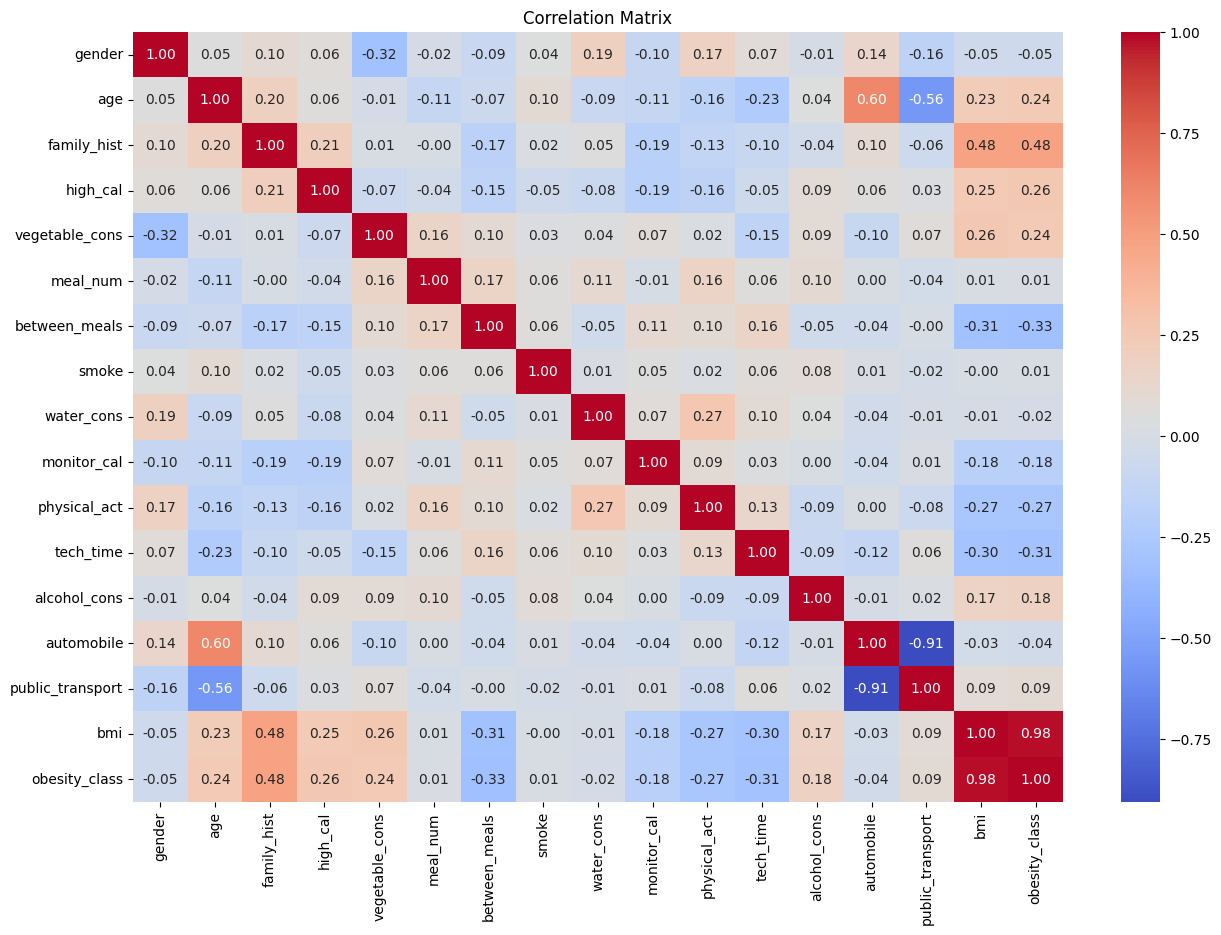

In [31]:
#creates correlation matrix
corrMatrix = dataFinal.corr()

plt.figure(figsize = (15,10))
sns.heatmap(corrMatrix, annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title('Correlation Matrix')
plt.show()

Most of the pairs result in a correlation around 0, indicated by the gray squares. Some pairs are shown to be more correlated (either positively or negatively) such as:

* `age` and `automobile`
* `age` and `public_transport`
* `automobile` and `public_transport`
* `bmi` and `obesity_class`

The `public_transport` variable may cause an issue of multicollinearity.

`obesity_class` is based off `bmi` so it makes sense that these are highly correlated. Also, these are the two options for a target variable which will not be used simultaneously. So we do not need to worry about multicollinearity.

Random forests are generally robust to multicollinearity and neural netoworks utilize correlation between features. So, these high correlations are not too much of a concern in this project.

### Pair plot of BMI vs. Age

`age` is the only continuous feature. We will plot this along with `bmi` on the $y$-axis. This is a check to see what the relationship is like between the variables and if `age` is a good indication of `bmi` level.

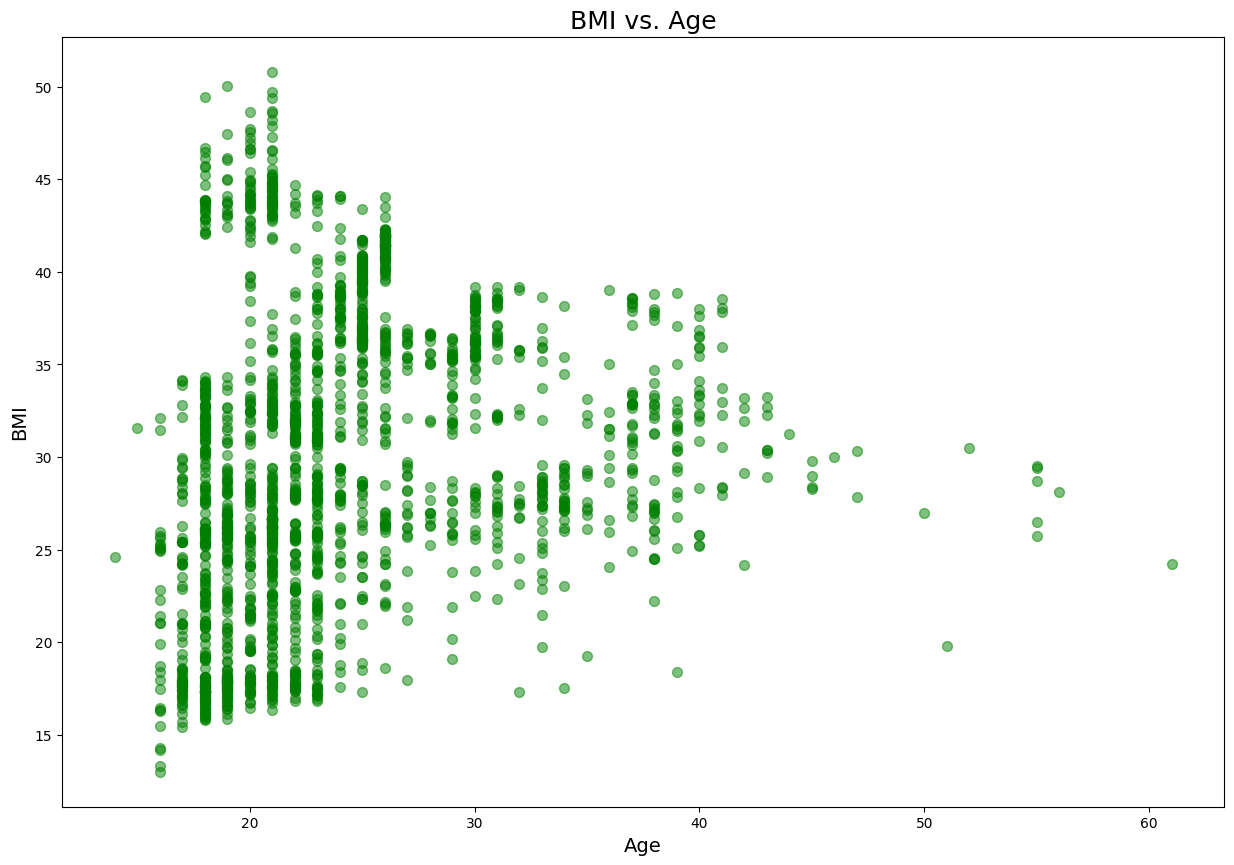

In [32]:
#creates and plots a pair plot
plt.figure(figsize=(15, 10))
plt.scatter(dataFinal['age'], dataFinal['bmi'], s = 50, alpha = .5, color = 'green')
plt.ylabel('BMI', fontsize = 14)
plt.xlabel('Age', fontsize = 14)
plt.title('BMI vs. Age', fontsize = 18)

plt.show()

The plot shows a reverse trumpet shape. The spread of `bmi` levels shows that age will not be a good predictor alone.

## Random Forest Classification

We proceed to our random forest modeling.

### Training and Test Set

In [33]:
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2111 non-null   int64  
 1   age               2111 non-null   int64  
 2   family_hist       2111 non-null   int64  
 3   high_cal          2111 non-null   int64  
 4   vegetable_cons    2111 non-null   int64  
 5   meal_num          2111 non-null   int64  
 6   between_meals     2111 non-null   int64  
 7   smoke             2111 non-null   int64  
 8   water_cons        2111 non-null   int64  
 9   monitor_cal       2111 non-null   int64  
 10  physical_act      2111 non-null   int64  
 11  tech_time         2111 non-null   int64  
 12  alcohol_cons      2111 non-null   int64  
 13  automobile        2111 non-null   int64  
 14  public_transport  2111 non-null   int64  
 15  bmi               2111 non-null   float64
 16  obesity_class     2111 non-null   int64  


In [34]:
#creates our X matrix of features
X_rf = dataFinal.drop(columns = ['bmi', 'obesity_class'])

In [35]:
X_rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gender            2111 non-null   int64
 1   age               2111 non-null   int64
 2   family_hist       2111 non-null   int64
 3   high_cal          2111 non-null   int64
 4   vegetable_cons    2111 non-null   int64
 5   meal_num          2111 non-null   int64
 6   between_meals     2111 non-null   int64
 7   smoke             2111 non-null   int64
 8   water_cons        2111 non-null   int64
 9   monitor_cal       2111 non-null   int64
 10  physical_act      2111 non-null   int64
 11  tech_time         2111 non-null   int64
 12  alcohol_cons      2111 non-null   int64
 13  automobile        2111 non-null   int64
 14  public_transport  2111 non-null   int64
dtypes: int64(15)
memory usage: 247.5 KB


In [36]:
#creates our y vector for the target variable
y_rf = dataFinal['obesity_class']

In [37]:
y_rf.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2111 entries, 0 to 2110
Series name: obesity_class
Non-Null Count  Dtype
--------------  -----
2111 non-null   int64
dtypes: int64(1)
memory usage: 16.6 KB


In [38]:
#creates our training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size = 0.2, random_state = 1)

### Hyperparameter Tuning

We now focus on hyperparameter tuning using grid search. You can see the different parameters and their possible values below.

In [39]:
#parameter grid of values
param_grid = {
    'n_estimators': [50, 100, 300, 500, 750, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3],
}

#initial classifier
rfp = RandomForestClassifier(random_state=1)

#grid search
grid_search = GridSearchCV(estimator=rfp, param_grid=param_grid, scoring = 'accuracy', cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

#best parameters and accuracy
best_param = grid_search.best_params_
best_acc = grid_search.best_score_

print("Best parameters: ", best_param)
print("Respective accuracy: {:.4f}".format(best_acc))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 750}
Respective accuracy: 0.7867


Above, we can see the best parameters. We proceed by using these parameters and adjusting the number of estimators once more.

In [40]:
#list of estimators
n_estimatorsList = [1, 10, 50, 100, 200, 300, 500, 750, 1000]

In [41]:
#loop to find accuracy for models with different number of estimators
accuracyValues = []

for n in n_estimatorsList:
    rfClassifier = RandomForestClassifier(n_estimators = n, max_depth = 20, max_features = 'sqrt',
                                          min_samples_leaf = 1, min_samples_split = 5, random_state = 1)

    rfClassifier.fit(X_train, y_train)

    y_pred = rfClassifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracyValues.append(accuracy)

    print(f'Accuracy with {n} estimators: {accuracy:.4f}')

Accuracy with 1 estimators: 0.6927
Accuracy with 10 estimators: 0.7730
Accuracy with 50 estimators: 0.7660
Accuracy with 100 estimators: 0.7801
Accuracy with 200 estimators: 0.7778
Accuracy with 300 estimators: 0.7825
Accuracy with 500 estimators: 0.7801
Accuracy with 750 estimators: 0.7849
Accuracy with 1000 estimators: 0.7801


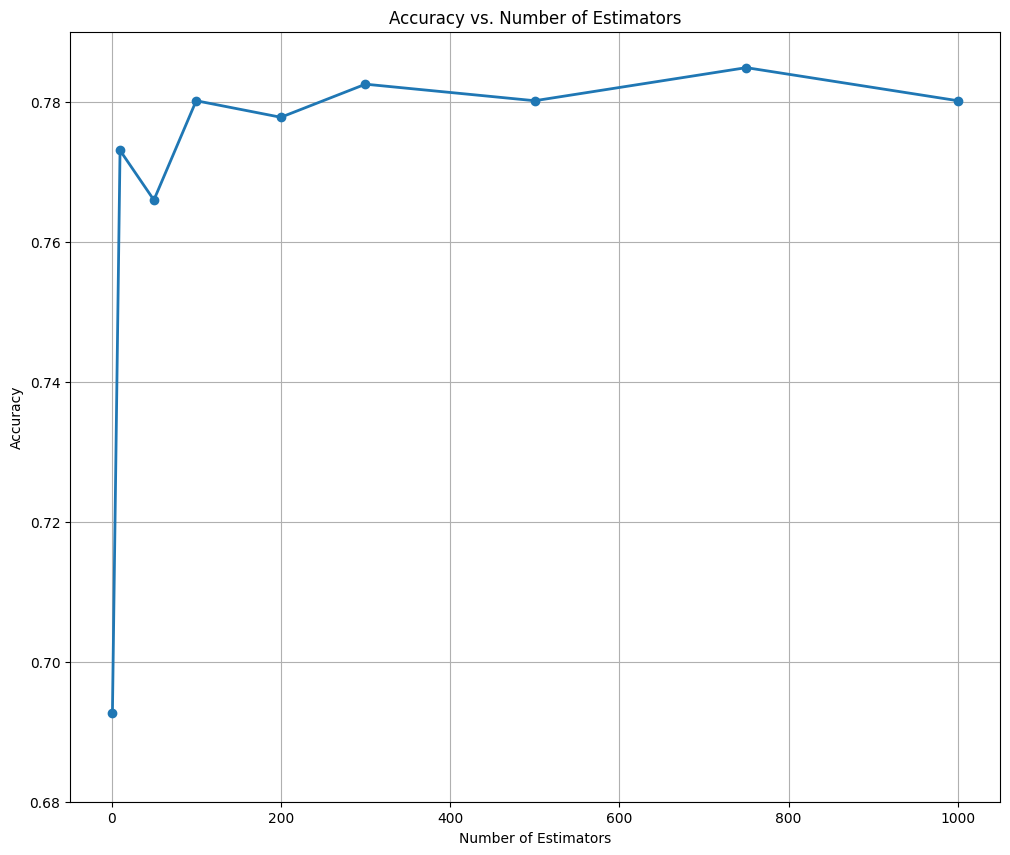

In [42]:
#plots accuracy vs number of estimators
plt.figure(figsize = (12,10))
plt.plot(n_estimatorsList, accuracyValues, marker = '.', linewidth = 2, markersize = 12)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.ylim(0.68, 0.79)
plt.grid(True)
plt.show()

We can see in our plot that the highest accuracy values are just above $0.78$. The model with 750 estimators has the highest accuracy at 0.7849. The model with 100 estimators is 0.7801. The higher accuracy comes at the expense of 650 more estimators. Similarly, the model with 300 estimators has slightly better accuracy at the expense of 200 more estimators. Because of these minor trade offs, the best model, with resources in mind, is the 100 estimator model.

### Best Model and Evaluation

In [43]:
#recreates our best/chosen model
rfClassifier = RandomForestClassifier(n_estimators = 100, max_depth = 20, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, random_state = 1)
rfClassifier.fit(X_train, y_train)

y_pred = rfClassifier.predict(X_test)

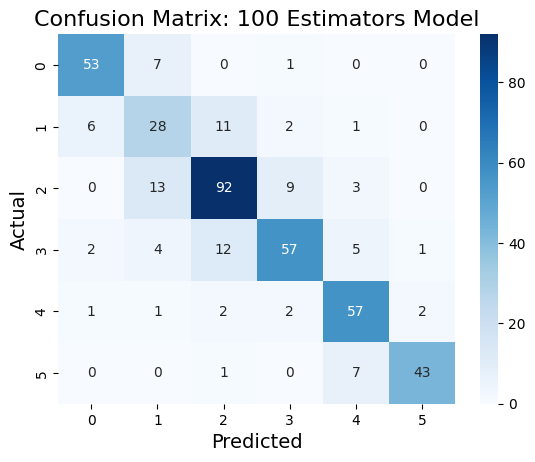

In [44]:
#creates confusion matrix of our best model using the test data
rf_cm = confusion_matrix(y_test, y_pred)
sns.heatmap(rf_cm, annot = True, cmap = 'Blues')
plt.xlabel('Predicted', fontsize = 14)
plt.ylabel('Actual', fontsize = 14)
plt.title('Confusion Matrix: 100 Estimators Model', fontsize = 16)
plt.show()

In the confusion matrix, we can see that the model performs fairly well. The classes `0`, `4`, and `5` (underweight, obesity II, and obesity III respectively) have few misclassifications, while classes `1`, `2`, and `3` tend to have more misclassifications.

In [45]:
#creates report
rf_report = classification_report(y_test, y_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        61
           1       0.53      0.58      0.55        48
           2       0.78      0.79      0.78       117
           3       0.80      0.70      0.75        81
           4       0.78      0.88      0.83        65
           5       0.93      0.84      0.89        51

    accuracy                           0.78       423
   macro avg       0.78      0.78      0.78       423
weighted avg       0.79      0.78      0.78       423



We see moderate to high F-1 scores for nearly all categories. The `1` class has a mediocre F-1 score. This tells us that our model performs well for all classes except `1`, the normal weight class.

The accuracy is approximately $78\%$. If this is indicative of the general population, the random forest model can predict obesity classes correctly for nearly 4 out 5 survey respondents.  

## Neural Network Classification

We can now shift to deep learning and utilize neural networks.

### Updating Dataset for Deep Learning

#### One Hot Encoding

Our first change involves one hot encoding the `obesity_class` column since there are multiple classes for the target variable.

In [46]:
#creates copy of dataFinal
dataDeep = dataFinal.copy()

In [47]:
#one hot encodes obesity class
encodedObesity = encoder.fit_transform(dataDeep[['obesity_class']])

encodedObesity_df = pd.DataFrame(encodedObesity.toarray(), columns = encoder.get_feature_names_out(['obesity_class']))

encodedObesity_df.head()

,obesity_class_0,obesity_class_1,obesity_class_2,obesity_class_3,obesity_class_4,obesity_class_5
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
#changes obesity columns to integers
encodedObesity_df = encodedObesity_df.astype('int')

In [49]:
#combines the cleaned data with the encoded dataframe
dataDeep = pd.concat([dataDeep, encodedObesity_df], axis = 1)

In [50]:
dataDeep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2111 non-null   int64  
 1   age               2111 non-null   int64  
 2   family_hist       2111 non-null   int64  
 3   high_cal          2111 non-null   int64  
 4   vegetable_cons    2111 non-null   int64  
 5   meal_num          2111 non-null   int64  
 6   between_meals     2111 non-null   int64  
 7   smoke             2111 non-null   int64  
 8   water_cons        2111 non-null   int64  
 9   monitor_cal       2111 non-null   int64  
 10  physical_act      2111 non-null   int64  
 11  tech_time         2111 non-null   int64  
 12  alcohol_cons      2111 non-null   int64  
 13  automobile        2111 non-null   int64  
 14  public_transport  2111 non-null   int64  
 15  bmi               2111 non-null   float64
 16  obesity_class     2111 non-null   int64  


In [51]:
#drops the columns for bmi and obesity class
dataDeep = dataDeep.drop(columns = ['bmi', 'obesity_class'])

In [52]:
dataDeep.head()

,gender,age,family_hist,high_cal,vegetable_cons,meal_num,between_meals,smoke,water_cons,monitor_cal,...,tech_time,alcohol_cons,automobile,public_transport,obesity_class_0,obesity_class_1,obesity_class_2,obesity_class_3,obesity_class_4,obesity_class_5
0,0,21,1,0,1,1,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
1,0,21,1,0,2,1,1,1,2,1,...,0,1,0,1,0,1,0,0,0,0
2,1,23,1,0,1,1,1,0,1,0,...,1,2,0,1,0,1,0,0,0,0
3,1,27,0,0,2,1,1,0,1,0,...,0,2,0,0,0,0,1,0,0,0
4,1,22,0,0,1,0,1,0,1,0,...,0,1,0,1,0,0,1,0,0,0


#### Scaling

Next we scale the dataset for convergence speed and stability.

In [53]:
#initializes scaler and scales data
scaler = MinMaxScaler()

dataScale = scaler.fit_transform(dataDeep)

dataDeep = pd.DataFrame(dataScale, columns = dataDeep.columns)

In [54]:
dataDeep.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,2111.0,0.505921,0.500083,0.0,0.000000,1.000000,1.000000,1.0
age,2111.0,0.212181,0.134227,0.0,0.106383,0.170213,0.255319,1.0
family_hist,2111.0,0.817622,0.386247,0.0,1.000000,1.000000,1.000000,1.0
high_cal,2111.0,0.883941,0.320371,0.0,1.000000,1.000000,1.000000,1.0
vegetable_cons,2111.0,0.606585,0.299698,0.0,0.500000,0.500000,1.000000,1.0
meal_num,2111.0,0.355282,0.260367,0.0,0.000000,0.500000,0.500000,1.0
between_meals,2111.0,0.380231,0.156181,0.0,0.333333,0.333333,0.333333,1.0
smoke,2111.0,0.020843,0.142893,0.0,0.000000,0.000000,0.000000,1.0
water_cons,2111.0,0.356229,0.299380,0.0,0.000000,0.500000,0.500000,1.0
monitor_cal,2111.0,0.045476,0.208395,0.0,0.000000,0.000000,0.000000,1.0


### Training and Test Split for Features and Targets

Next we perform our training and test split for the feature matrix and target matrix.

In [55]:
#saves target column names
target_columns = encoder.get_feature_names_out()
print(target_columns)

['obesity_class_0' 'obesity_class_1' 'obesity_class_2' 'obesity_class_3'
 'obesity_class_4' 'obesity_class_5']


In [56]:
#creates feature matrix and target matrix
X_deep = dataDeep.drop(columns = target_columns)
y_deep = dataDeep[target_columns]

In [57]:
#creates training and test split
X_train_deep, X_test_deep, y_train_deep, y_test_deep = train_test_split(X_deep, y_deep, test_size = 0.2, random_state = 1)

### Architecture 1 - Modeling

We start with our model architecture. First, we create a function laying out the model architecture. This will by used in our hyperparameter tuning step. We use a feed-forward network that reduces the amount of neurons in later layers. Dropouts were also used to address overfitting. The output layer ensures that the number of neurons matches the number of classes in the target matrix.

In [58]:
#creates function for model creation
def create_model(dropout_rate = 0.5):
    #initializes sequential model
    model = Sequential()

    #input dense layer
    model.add(Dense(128, input_dim = X_train_deep.shape[1], activation = 'relu'))

    #dropout
    model.add(Dropout(dropout_rate, seed = 1))

    #dense layer
    model.add(Dense(64, activation = 'relu'))

    #dropout
    model.add(Dropout(dropout_rate, seed = 1))

    #dense layer
    model.add(Dense(32, activation = 'relu'))

    #output dense layer
    model.add(Dense(y_train_deep.shape[1], activation = 'softmax'))

    #compiles model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

We also define early stopping in the case that a model no longer improves.

In [59]:
#defines early stopping
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 10, restore_best_weights = True)

#### Hyperparameter Tuning

We set our lists for our possible hyperparameter values. Note, these options were chosen to address overfitting.

In [60]:
#lists for hyperparameters and tuning
epochs_list = [100, 200]
batch_size_list = [16, 32]
dropout_rate_list = [0.2, 0.3, 0.4, 0.5]

Next, we loop through every combination of the hyperparameter values. There are print statements showing which model becomes the best in terms of validation accuracy.

In [61]:
#initializes variables and list
best_acc = 0
best_params = {}

#for loop to try every combination of hyperparameter values
for e in epochs_list:
    for b in batch_size_list:
        for d in dropout_rate_list:
            model = create_model(dropout_rate = d)

            history = model.fit(X_train_deep, y_train_deep, epochs = e, batch_size = b,
                                validation_split = 0.2, verbose = 0, callbacks = [early_stopping])

            best_val_acc = max(history.history['val_accuracy'])

            if best_val_acc > best_acc:
                best_acc = best_val_acc
                best_params = {'epochs': e, 'batch_size': b, 'dropout_rate': d}
                print(f"Dropout: {d}, Epochs: {e}, Batch Size: {b}, \nBest Validation Accuracy: {best_val_acc:.4f}\n")

print(f"\nOverall Best Accuracy: {best_acc:.4f} \nUsing Hyperparameters: {best_params}")

Dropout: 0.2, Epochs: 100, Batch Size: 16, 
Best Validation Accuracy: 0.7130

Dropout: 0.2, Epochs: 100, Batch Size: 32, 
Best Validation Accuracy: 0.7278


Overall Best Accuracy: 0.7278 
Using Hyperparameters: {'epochs': 100, 'batch_size': 32, 'dropout_rate': 0.2}


We can see the best validation accuracy above, along with the hyperparameter values used.

We recreate this model below.

In [62]:
#recreates the most accurate model
best_model = create_model(dropout_rate = best_params['dropout_rate'])

In [63]:
#fits the most accurate model
best_history = best_model.fit(X_train_deep, y_train_deep, epochs = best_params['epochs'], batch_size = best_params['batch_size'],
               validation_split = 0.2, verbose = 1, callbacks = [early_stopping])

Epoch 1/100
43/43 [==============================] - 2s 7ms/step - loss: 1.7237 - accuracy: 0.2644 - val_loss: 1.6609 - val_accuracy: 0.3639
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 1.5239 - accuracy: 0.4141 - val_loss: 1.4433 - val_accuracy: 0.3964
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 1.3080 - accuracy: 0.4763 - val_loss: 1.2837 - val_accuracy: 0.4467
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 1.2077 - accuracy: 0.5044 - val_loss: 1.2132 - val_accuracy: 0.4320
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 1.1223 - accuracy: 0.5296 - val_loss: 1.1569 - val_accuracy: 0.4615
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 1.1040 - accuracy: 0.5296 - val_loss: 1.1135 - val_accuracy: 0.4852
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 1.0594 - accuracy: 0.5452 - val_loss: 1.0748 - val_accuracy: 0.4911
Epoch 8/100
4

#### Evaluation

We can now see what the accuracy is for the test set using our model.

In [64]:
#calculates test loss and test accuracy
test_loss, test_accuracy = best_model.evaluate(X_test_deep, y_test_deep, verbose = 0)
print(f'Test Accuracy: {test_accuracy: .4f}')

Test Accuracy:  0.6809


We can see that our accuracy dropped a bit with our test set. The validation accuracy was just over $72\%$ while the test accuracy was approximately $68\%$

Next, we can look at accuracy and loss plots.

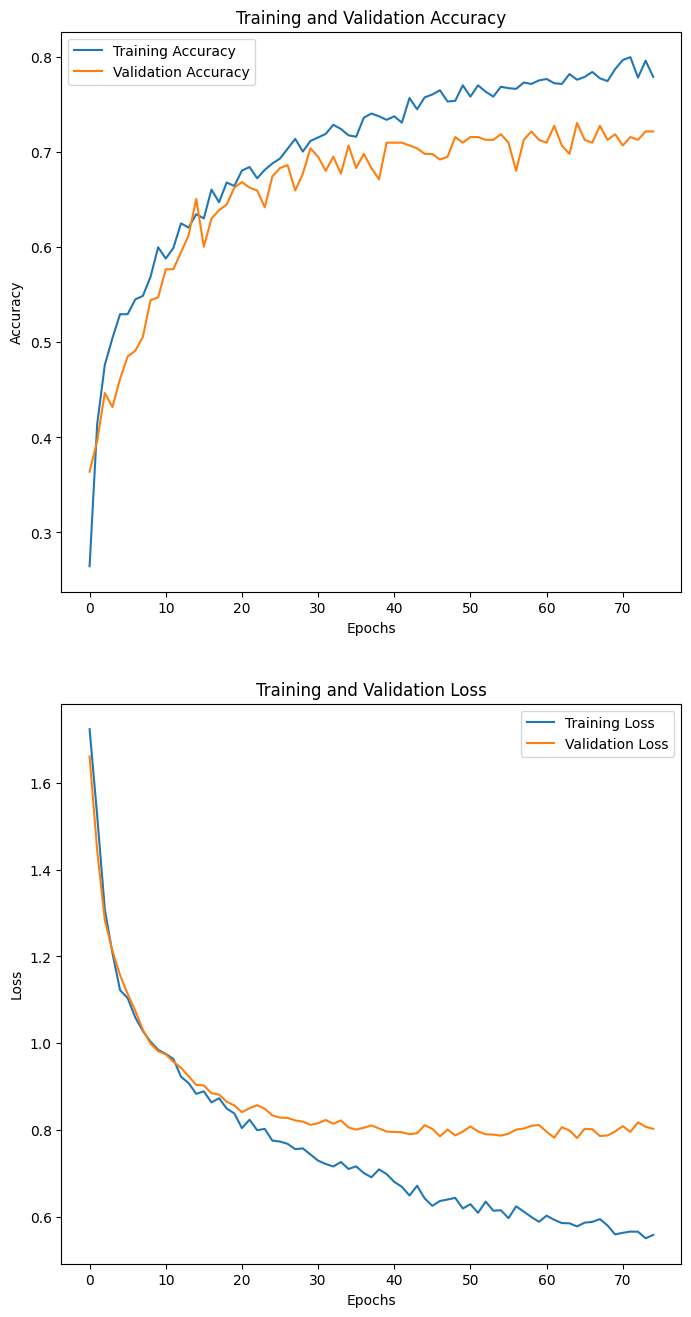

In [65]:
#plots accuracy and loss plots
#renames history
hist_data = best_history.history

#plots figure
plt.figure(figsize = (8, 16))

#accuracy plots
plt.subplot(2, 1, 1)
plt.plot(hist_data['accuracy'], label = 'Training Accuracy')
plt.plot(hist_data['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#loss plots
plt.subplot(2, 1, 2)
plt.plot(hist_data['loss'], label = 'Training Loss')
plt.plot(hist_data['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see that all of the plots begin leveling out.

For the accuracy plots, it appears that the validation plot levels out around $0.71$ while the training plot begins leveling out near $0.78$

For the loss plots, validation loss levels out near $0.8$. The training loss is just beginning to level out around $0.55$.

It seems that the model does fairly well with fitting. The training and validation values remain relatively close together, though the loss plots are beginning to separate.

### Architecture 2 - Modeling

Next, we create a more complex model. It is similar to our first model, but we start with more neurons, we have more layers, and we add batch normalization.

In [66]:
#creates function for model creation
def create_complex_model(dropout_rate = 0.5):
    #initializes sequential model
    model = Sequential()

    #input dense layer
    model.add(Dense(256, input_dim = X_train_deep.shape[1], activation = 'relu'))

    #batch normalization
    model.add(BatchNormalization())

    #dropout
    model.add(Dropout(dropout_rate, seed = 1))

    #dense layer
    model.add(Dense(128, activation = 'relu'))

    #batch normalization
    model.add(BatchNormalization())

    #dropout
    model.add(Dropout(dropout_rate, seed = 1))

    #dense layer
    model.add(Dense(64, activation = 'relu'))

    #batch normalization
    model.add(BatchNormalization())

    #dropout
    model.add(Dropout(dropout_rate, seed = 1))

    #dense layer
    model.add(Dense(32, activation = 'relu'))

    #batch normalization
    model.add(BatchNormalization())

    #output dense layer
    model.add(Dense(y_train_deep.shape[1], activation = 'softmax'))

    #compiles model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

#### Hyperparameter Tuning

We will reuse the early stopping and hyperparameter lists from earlier. Next, we loop through the different combinations.

In [67]:
#initializes variables and list
best_acc = 0
best_params = {}

#for loop to try every combination of hyperparameter values
for e in epochs_list:
    for b in batch_size_list:
        for d in dropout_rate_list:
            model = create_complex_model(dropout_rate = d)

            history = model.fit(X_train_deep, y_train_deep, epochs = e, batch_size = b,
                                validation_split = 0.2, verbose = 0, callbacks = [early_stopping])

            best_val_acc = max(history.history['val_accuracy'])

            if best_val_acc > best_acc:
                best_acc = best_val_acc
                best_params = {'epochs': e, 'batch_size': b, 'dropout_rate': d}
                print(f"Dropout: {d}, Epochs: {e}, Batch Size: {b}, \nBest Validation Accuracy: {best_val_acc:.4f}\n")

print(f"\nOverall Best Accuracy: {best_acc:.4f} \nUsing Hyperparameters: {best_params}")

Dropout: 0.2, Epochs: 100, Batch Size: 16, 
Best Validation Accuracy: 0.7101

Dropout: 0.3, Epochs: 100, Batch Size: 16, 
Best Validation Accuracy: 0.7249

Dropout: 0.2, Epochs: 100, Batch Size: 32, 
Best Validation Accuracy: 0.7308

Dropout: 0.2, Epochs: 200, Batch Size: 16, 
Best Validation Accuracy: 0.7337


Overall Best Accuracy: 0.7337 
Using Hyperparameters: {'epochs': 200, 'batch_size': 16, 'dropout_rate': 0.2}


We can see the best validation accuracy above, along with the hyperparameter values used.

We recreate this model below.

In [68]:
#recreates the most accurate model
best_complex_model = create_complex_model(dropout_rate = best_params['dropout_rate'])

In [69]:
#fits the most accurate model
best_complex_history = best_complex_model.fit(X_train_deep, y_train_deep, epochs = best_params['epochs'], batch_size = best_params['batch_size'],
               validation_split = 0.2, verbose = 1, callbacks = [early_stopping])

Epoch 1/200
85/85 [==============================] - 3s 8ms/step - loss: 1.6552 - accuracy: 0.3763 - val_loss: 1.6751 - val_accuracy: 0.3107
Epoch 2/200
85/85 [==============================] - 0s 4ms/step - loss: 1.2665 - accuracy: 0.5000 - val_loss: 1.6253 - val_accuracy: 0.2219
Epoch 3/200
85/85 [==============================] - 0s 4ms/step - loss: 1.1636 - accuracy: 0.5422 - val_loss: 1.4126 - val_accuracy: 0.3195
Epoch 4/200
85/85 [==============================] - 0s 4ms/step - loss: 1.1417 - accuracy: 0.5511 - val_loss: 1.1971 - val_accuracy: 0.5089
Epoch 5/200
85/85 [==============================] - 0s 4ms/step - loss: 1.0662 - accuracy: 0.5770 - val_loss: 1.0392 - val_accuracy: 0.5917
Epoch 6/200
85/85 [==============================] - 0s 4ms/step - loss: 1.0244 - accuracy: 0.5830 - val_loss: 0.9364 - val_accuracy: 0.6243
Epoch 7/200
85/85 [==============================] - 0s 4ms/step - loss: 0.9995 - accuracy: 0.6059 - val_loss: 0.9146 - val_accuracy: 0.6450
Epoch 8/200
8

#### Evaluation

We can now see what the accuracy is for the test set using our model.

In [70]:
#calculates test loss and test accuracy
test_loss, test_accuracy = best_complex_model.evaluate(X_test_deep, y_test_deep, verbose = 0)
print(f'Test Accuracy: {test_accuracy: .4f}')

Test Accuracy:  0.6856


We can see that our accuracy dropped a bit with our test set. The validation accuracy was just over $73\%$ while the test accuracy was nearly $69\%$

Next, we can look at accuracy and loss plots.

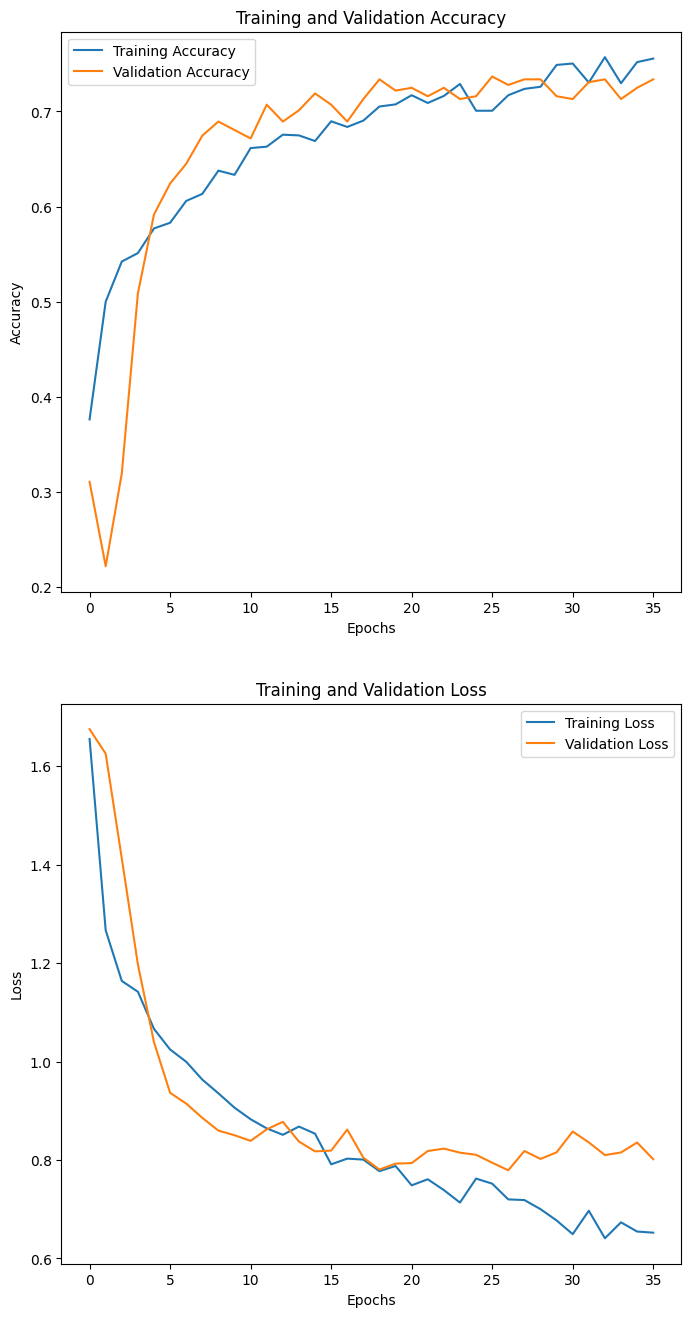

In [71]:
#plots accuracy and loss plots
#renames history
hist_complex = best_complex_history.history

#plots figure
plt.figure(figsize = (8, 16))

#accuracy plots
plt.subplot(2, 1, 1)
plt.plot(hist_complex['accuracy'], label = 'Training Accuracy')
plt.plot(hist_complex['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#loss plots
plt.subplot(2, 1, 2)
plt.plot(hist_complex['loss'], label = 'Training Loss')
plt.plot(hist_complex['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see that all of the plots begin leveling out like in the previous architecture.

For the accuracy plots, both the validation plot and the training plot level out between $0.7$ and $0.73$.

For the loss plots, validation loss levels out near $0.8$. The training loss is just beginning to level out around $0.65$.

The notable difference to this architecture is how close the training and validation plots are. The accuracy plots are nearly even while the loss plots are a lot closer compared to the previous architecture.

## Conclusion

We set out in this project knowing that random forest models generally perform better with smaller feature sets. Our goal was to get a deep learning model as close as possible to a high performing random forest model.

#### Random Forest

Our random forest model did a great job in my opinion. Using only survey questions while excluding height, weight, and BMI from the model, we were able to achieve over $78\%$ accuracy with obesity classification. This seems acceptable, knowing that response bias is an issue. An improvement that the modeling could benefit from is sampling more people from the lesser represented groups, such as the normal obesity class. The F-1 scores were all fairly high except for this class. I believe we reached our first goal in achieving a reasonably accurate model, considering that we were working with survey data and excluding features.


#### Neural Networks

The neural network models seemed promising at first. Training and validation accuracy were approaching the random forest cross validation accuracy. In the end, the test accuracy for both architectures fell a little short.

The first architecture had better metric values for training and validation, but the second architecture was more consistent between training and validation.

This consistency is likely what led to the higher test accuracy with the more complex model (second architecture).

The second neural network test accuracy was about $69\%$, compared to the random forest test accuracy of about $78\%$. We knew that the deep learning approach should be outperformed, so this was not shocking. Also, it is possible that we can tune the hyperparameters differently, or use a different neural network architecture to achieve better results. For this dataset, I believe we achieved our goal of creating a neural network that performs as close to an optimal random forest model as possible.